# Find centers for Wavelength studies of Scalar solver for C0 and C1 ARF (6 tube)


In [1]:
import numpy as np
import ngsolve as ng
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.pbg import ARF2
from ngsolve.webgui import Draw


importing NGSolve-6.2.2203-56-g47f483033


## Build arf object

In [2]:
wls = np.linspace(1, 2, 200) * 1e-6
i=150

# Find centers for C1 then use for C0

In [23]:
A = ARF2(name='fine_cladding', poly_core=True, wl=wls[i])

ModeSolver: Checking if mesh has required regions
Mesh has  21941  elements,  10989  points,  and  32929  edges.


In [24]:
# Shift search center due to material change
center = 2.24
radius = .02
npts = 4
nspan = 4
alpha = 5
p = 2

_, y, _, beta, _, _ = A.leakymode(p,
                                  ctr=center,
                                  rad=radius,
                                  alpha=alpha,
                                  nspan=nspan,
                                  npts=npts,
                                  niterations=12,
                                  nrestarts=0,
                                  stop_tol=1e-9,
                                  inverse='umfpack')


ModeSolver.leakymode called on object with these settings:
Set freq-dependent PML with p= 2  alpha= 5 and thickness=2.000

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.02, Center=2.24+0j
SpectralProjNGPoly: Checking if A[d] is nonzero & Hermitian.
SpectralProjNG: Checking if inverse.H works for umfpack
SpectralProjNGPoly: Computing resolvents along the contour using
                    inverse type umfpack (installed default umfpack)
SpectralProjNGPoly: Factorizing 43918x43918 system at z =  +2.254 +0.014j
SpectralProjNGPoly: Factorizing 43918x43918 system at z =  +2.226 +0.014j
SpectralProjNGPoly: Factorizing 43918x43918 system at z =  +2.226 -0.014j
SpectralProjNGPoly: Factorizing 43918x43918 system at z =  +2.254 -0.014j

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [1.6e+02 8.2e-07 8.5e-12 1.4e-06]
   Real part of c

In [25]:
for f in y:
    Draw(f, A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

Okay, now vary and make a polynomial regression

In [6]:
ys = np.array([2.204, 
               2.225, 
               2.236,
               2.246,
               2.256,
              ])

xs = np.array([wls[0], 
               wls[50], 
               wls[100],
               wls[150],
               wls[199],
              ])

a, b, c, d = np.polyfit(xs, ys, 3)
centers = a * wls**3 + b * wls**2 + c * wls + d

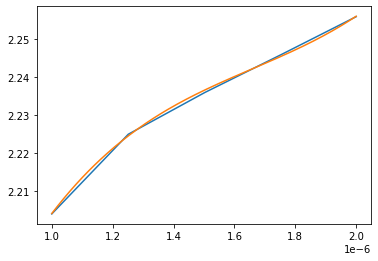

In [9]:
plt.plot(xs, ys)
plt.plot(wls, centers)

# Now for C0

In [29]:
# Set outer materials
scaling = 15
n_glass = 1.4388164768221814
n_air = 1.00027717

T_outer = 10 / scaling
n0 = n_glass  # Sets buffer and outer region refractive index.

outer_materials = [

    {'material': 'Outer',
     'n': n0,
     'T': T_outer,
     'maxh': .1}
]
i = 175

In [30]:
B = ARF2(name='fine_cladding', poly_core=True, refine=ref,
         curve=max(p+1, 8), shift_capillaries=False, wl=wls[i],
         outer_materials=outer_materials,
        )

ModeSolver: Checking if mesh has required regions
Mesh has  22111  elements,  11176  points,  and  33286  edges.


In [31]:
glass_center = (B.L**2 * B.k**2 * (n0**2 - n_air**2) + centers[i]**2)**.5
glass_center

51.913407851488486

In [34]:
# Shift search center due to material change
center = glass_center
radius = .01
npts = 4
nspan = 4
p = 3

_, y, _, beta, _, _ = B.leakymode(p,
                                  ctr=center,
                                  rad=radius,
                                  alpha=alpha,
                                  nspan=nspan,
                                  npts=npts,
                                  niterations=8,
                                  nrestarts=0,
                                  stop_tol=1e-9,
                                  inverse='umfpack')


ModeSolver.leakymode called on object with these settings:
Set freq-dependent PML with p= 3  alpha= 5 and thickness=0.667

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=51.9134+0j
SpectralProjNGPoly: Checking if A[d] is nonzero & Hermitian.
SpectralProjNG: Checking if inverse.H works for umfpack
SpectralProjNGPoly: Computing resolvents along the contour using
                    inverse type umfpack (installed default umfpack)
SpectralProjNGPoly: Factorizing 99859x99859 system at z = +51.920 +0.007j
SpectralProjNGPoly: Factorizing 99859x99859 system at z = +51.906 +0.007j
SpectralProjNGPoly: Factorizing 99859x99859 system at z = +51.906 -0.007j
SpectralProjNGPoly: Factorizing 99859x99859 system at z = +51.920 -0.007j

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [1.7e+02 1.6e-05 8.6e-05 2.0e-04]
   Real part o

In [35]:
for f in y:
    Draw(f, B.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…